# Google Play Store Data Analysis

## Problem Statement
The Google Play Store hosts millions of applications. This project aims to analyze app data to
understand factors affecting app popularity, ratings, and user engagement.

## Objectives
- Analyze app ratings, installs, and reviews
- Compare free vs paid apps
- Identify top categories and genres
- Understand user sentiment
- Provide business recommendations

In [1]:
import pandas as pd

apps = pd.read_csv("data/googleplaystore.csv")
reviews = pd.read_csv("data/googleplaystore_user_reviews.csv")

apps.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
# 1. Cleaning 'Installs' - Remove '+' and ',' and convert to numeric
apps['Installs'] = apps['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
# Remove the one row that has 'Free' in the Installs column (data entry error)
apps = apps[apps['Installs'] != 'Free']
apps['Installs'] = pd.to_numeric(apps['Installs'])

# 2. Cleaning 'Size' - Convert 'M' to MB and 'k' to KB (and then to MB)
def clean_size(size):
    if 'M' in str(size):
        return float(size.replace('M', ''))
    elif 'k' in str(size):
        return float(size.replace('k', '')) / 1024
    return None # For 'Varies with device'

apps['Size_MB'] = apps['Size'].apply(clean_size)

# 3. Cleaning 'Price' - Remove '$'
apps['Price'] = apps['Price'].str.replace('$', '', regex=False).astype(float)

# 4. Drop missing Ratings (important for accuracy)
apps = apps.dropna(subset=['Rating'])

print("Cleaning Complete! Here are the updated data types:")
print(apps.dtypes[['Installs', 'Size_MB', 'Price', 'Rating']])

Cleaning Complete! Here are the updated data types:
Installs      int64
Size_MB     float64
Price       float64
Rating      float64
dtype: object


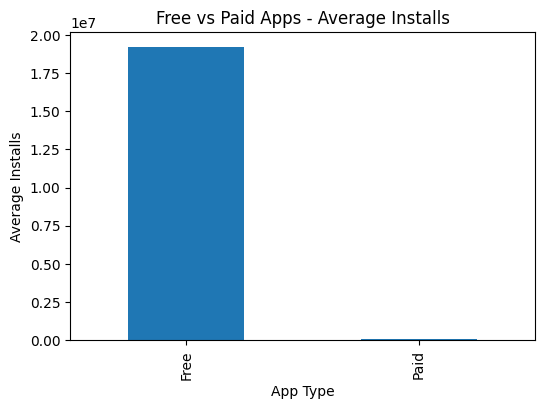

In [3]:
import matplotlib.pyplot as plt

free_paid = apps.groupby('Type')['Installs'].mean()

free_paid.plot(kind='bar', figsize=(6,4))
plt.xlabel("App Type")
plt.ylabel("Average Installs")
plt.title("Free vs Paid Apps - Average Installs")
plt.show()

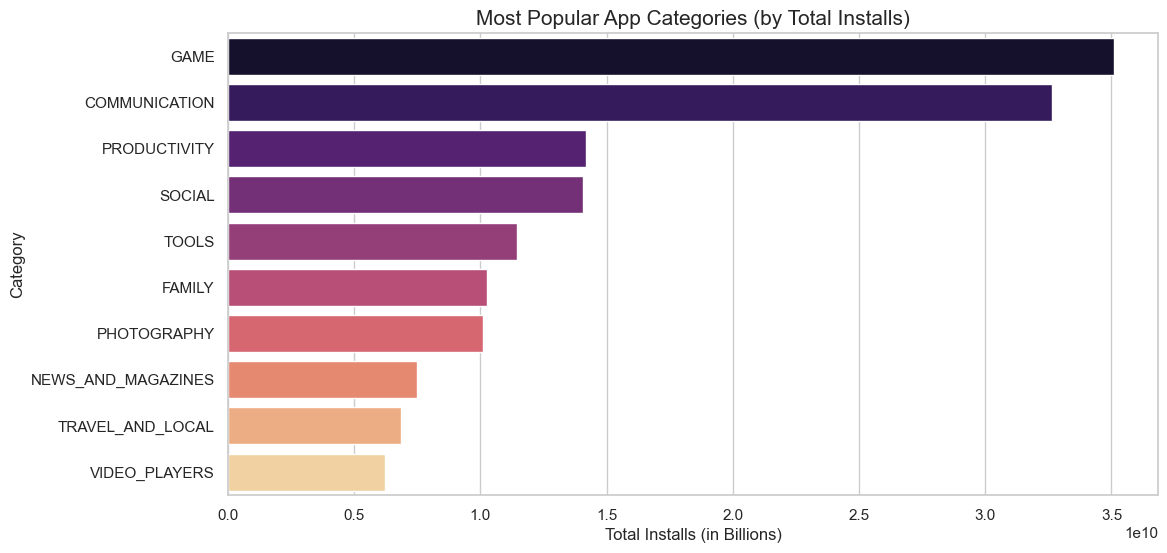

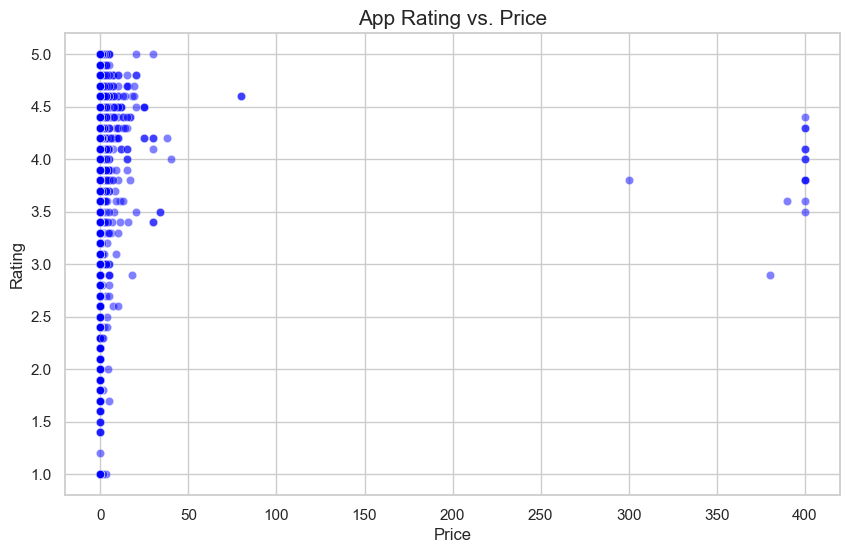

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_theme(style="whitegrid")

# Chart 1: Top 10 Categories by Number of Installs
top_categories = apps.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
# We added 'hue=top_categories.index' and 'legend=False' to fix the warning
sns.barplot(
    x=top_categories.values, 
    y=top_categories.index, 
    hue=top_categories.index, 
    palette='magma', 
    legend=False
)
plt.title('Most Popular App Categories (by Total Installs)', fontsize=15)
plt.xlabel('Total Installs (in Billions)')
plt.show()

# Chart 2: Relationship between Rating and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=apps, x='Price', y='Rating', alpha=0.5, color='blue')
plt.title('App Rating vs. Price', fontsize=15)
plt.show()

## Category-wise Popularity
Game, Communication, and Tools categories dominate the Play Store in terms of total installs,
indicating high user demand in these segments.

In [5]:
apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')
apps = apps.dropna(subset=['Reviews', 'Rating'])
print("Reviews converted")


Reviews converted


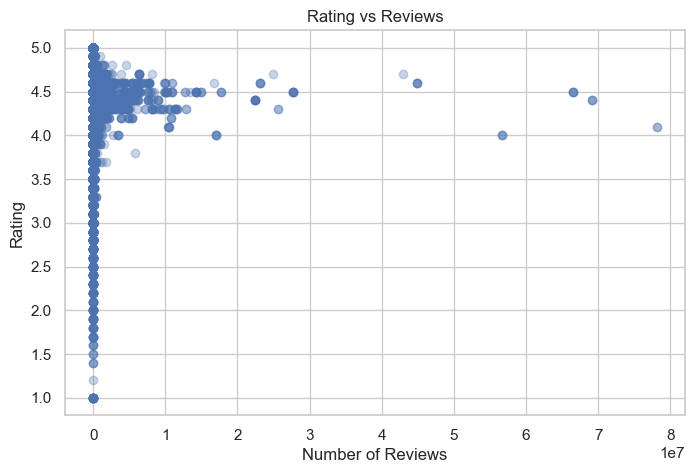

In [6]:
plt.figure(figsize=(8,5))
plt.scatter(apps['Reviews'], apps['Rating'], alpha=0.3)
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.title("Rating vs Reviews")
plt.show()

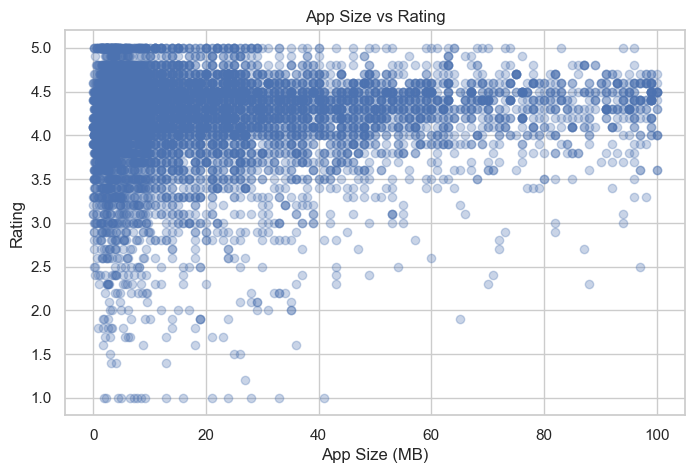

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(apps['Size_MB'], apps['Rating'], alpha=0.3)
plt.xlabel("App Size (MB)")
plt.ylabel("Rating")
plt.title("App Size vs Rating")
plt.show()

There is no strong correlation between app size and rating.

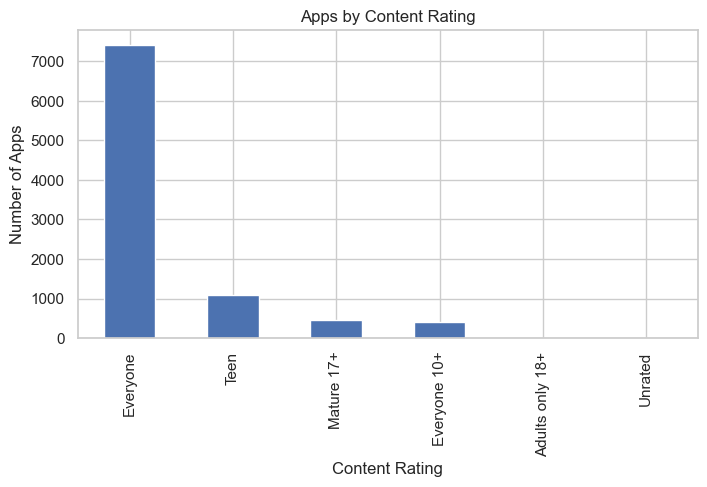

In [8]:
content_counts = apps['Content Rating'].value_counts()

content_counts.plot(kind='bar', figsize=(8,4))
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.title("Apps by Content Rating")
plt.show()

Most apps are suitable for 'Everyone', indicating a broad target audience.

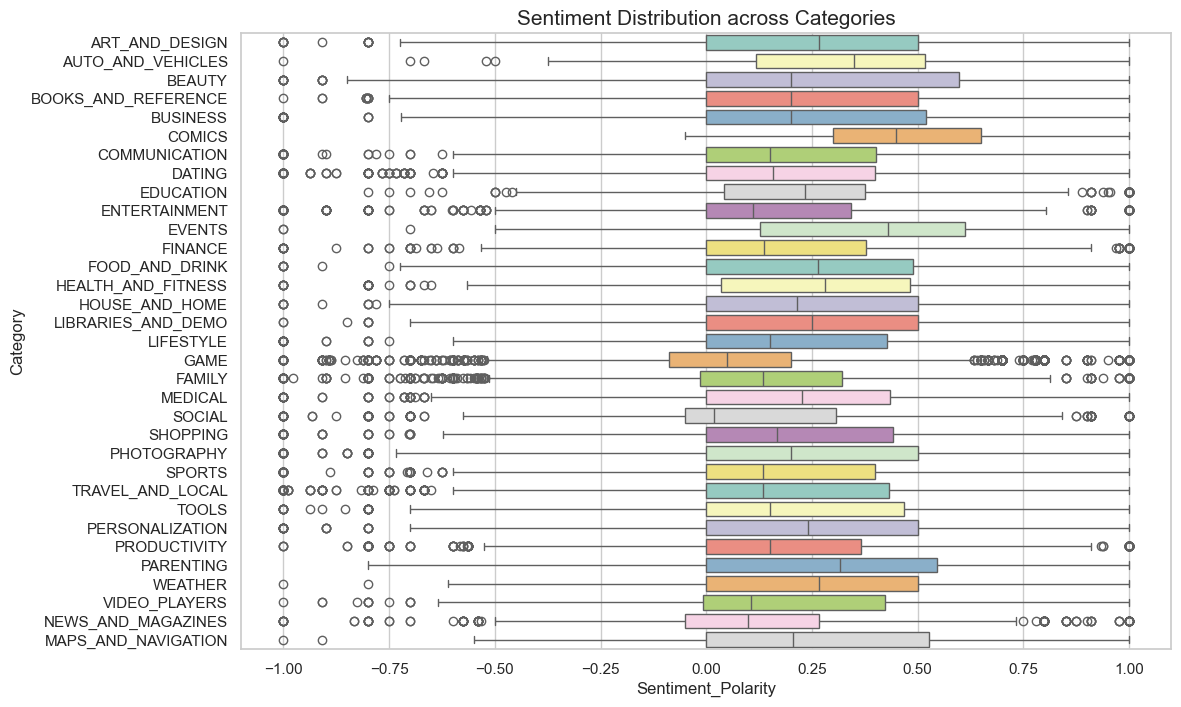

In [9]:
# 1. Merge the dataframes first (This creates 'merged_df')
merged_df = pd.merge(apps, reviews, on='App', how='inner')

# 2. Clean the merged data (remove rows with no review text or sentiment)
merged_df = merged_df.dropna(subset=['Translated_Review', 'Sentiment_Polarity'])

# 3. Now create the plot
plt.figure(figsize=(12, 8))

sns.boxplot(
    x='Sentiment_Polarity', 
    y='Category', 
    data=merged_df, 
    hue='Category',    # Fixed the warning from before
    palette='Set3', 
    legend=False       # Fixed the warning from before
)

plt.title('Sentiment Distribution across Categories', fontsize=15)
plt.show()

## Sentiment Analysis by Category

Most app categories show a positive median sentiment polarity, indicating overall
positive user feedback. Categories with higher sentiment polarity tend to have
better user engagement and satisfaction.